In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fnViz as fn
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def printAll(cmd):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(cmd)

In [3]:
df = pd.read_csv('./all_data.csv')

In [4]:
## Rename each columns
df = df.rename(columns={'No':'no',
                            'SubjectID':'sid',
                            'Gender':'gender',
                            'Birthday (mm/dd/yyyy)':'birthday',
                            'Age':'age',
                            'Number of residents':'numResident',
                            'Height':'height',
                            'Body weight':'bodyWeight',
                            'Strides (cm)':'strides',
                            'Antihypertensive':'antihypertensive',
                            'Antidepressant':'antidepressant',
                            'Osteoporosis drug':'osteoporosis',
                            'Antidiabetic drug':'antidiabetic',
                            'Smoking':'smoking',
                            'Drinking':'drinking',
                            'Family composition of living together':'familyLiving',
                            'Hobby':'hobby',
                            'Community':'community',
                            'Everyday With or without weight measurement':'weightMeasure',
                            'Everyday With or without blood pressure measurement':'MesurementBloodPressure',
                            'Appetite':'appetite',
                            'Eating habit':'eatingHabbit',
                            'Preference':'preference',
                            'Sleep':'sleep',
                            'Anxiety about health':'anxietyHealth',
                            'Anxiety about forgetfulness':'anxietyForgetful',
                            'up and down stairs without transmitted':'stairWithoutTransmitted',
                            'get up from the chair':'getupChair',
                            'walk for more than 15 minutes':'walk15m',
                            'walk without a cane':'walkWithoutCane',
                            'actively going out':'goingout',
                            'No weight loss of more than 2-3 kg in the last 6 months':'noWeightLoss6',
                            'No weight gain of more than 2-3 kg in the last 2 months':'noWeightLoss2',
                            'I can eat hard food':'eatHardFood',
                            'Disease name':'disease',
                            'Target':'target'})

### Dealing with null values

In [5]:
printAll(df.isnull().sum())

no                            0
sid                           0
gender                        0
birthday                      0
age                           0
numResident                   0
height                        0
bodyWeight                    0
strides                       2
Body Fat Percentage           1
Basal Metabolism              1
Skeletal Muscle Percentage    1
Visceral Fat Level            1
Body Age                      1
BMI                           0
antihypertensive              0
antidepressant                0
osteoporosis                  0
antidiabetic                  0
smoking                       0
drinking                      0
familyLiving                  0
hobby                         0
community                     2
weightMeasure                 0
MesurementBloodPressure       0
appetite                      0
eatingHabbit                  0
preference                    0
sleep                         0
anxietyHealth                 0
anxietyF

In [6]:
df["strides"] = df["strides"].fillna(method='ffill')

In [7]:
### Convert 'commuity' column to LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
def LabelEncoder(frame):
    d = frame.select_dtypes(include=['object'])
    cols = d.columns
    for col in cols:
        frame[col] = le.fit_transform(frame[col])
    return frame

In [9]:
df = LabelEncoder(df)

In [10]:
df

,no,sid,gender,birthday,age,numResident,height,bodyWeight,strides,Body Fat Percentage,...,stairWithoutTransmitted,getupChair,walk15m,walkWithoutCane,goingout,noWeightLoss6,noWeightLoss2,eatHardFood,high blood pressure,target
0,1,8,0,27,74,3,145.0,39.0,35.0,26.9,...,1,0,1,1,1,0,0,0,1,0
1,2,7,0,22,73,2,155.0,50.0,44.0,34.1,...,1,0,1,1,1,0,0,0,0,1
2,3,21,0,24,76,2,154.0,56.5,26.9,32.5,...,1,0,1,1,1,0,0,0,1,0
3,4,5,1,25,81,2,158.0,65.0,32.3,25.5,...,1,0,1,1,1,0,0,0,1,0
4,5,0,0,18,77,2,156.0,60.0,41.4,40.0,...,1,0,1,1,1,0,0,0,0,0
5,6,2,0,7,85,1,158.0,59.5,32.0,28.5,...,0,0,0,0,0,0,0,0,1,0
6,7,3,0,16,71,1,148.0,52.0,46.0,35.7,...,1,0,0,0,0,0,0,0,0,0
7,8,4,0,19,92,1,157.0,60.0,35.5,33.4,...,0,0,0,0,1,0,0,0,1,0
8,9,10,1,6,78,2,169.5,66.0,58.7,28.3,...,1,0,1,1,1,0,0,0,1,1
9,10,13,1,26,79,2,165.0,58.0,65.0,22.9,...,1,0,1,1,1,0,0,0,1,0


In [11]:
df['community']=df['community'].fillna(df['community'].mode())
df['Body Fat Percentage']=df['Body Fat Percentage'].fillna(df['Body Fat Percentage'].mean())
df['Basal Metabolism']=df['Basal Metabolism'].fillna(df['Basal Metabolism'].mean())
df['Skeletal Muscle Percentage']=df['Skeletal Muscle Percentage'].fillna(df['Skeletal Muscle Percentage'].mean())
df['Visceral Fat Level']=df['Visceral Fat Level'].fillna(df['Visceral Fat Level'].mean())
df['Body Age']=df['Body Age'].fillna(df['Body Age'].mean())

In [12]:
printAll(df.isnull().sum())

no                            0
sid                           0
gender                        0
birthday                      0
age                           0
numResident                   0
height                        0
bodyWeight                    0
strides                       0
Body Fat Percentage           0
Basal Metabolism              0
Skeletal Muscle Percentage    0
Visceral Fat Level            0
Body Age                      0
BMI                           0
antihypertensive              0
antidepressant                0
osteoporosis                  0
antidiabetic                  0
smoking                       0
drinking                      0
familyLiving                  0
hobby                         0
community                     0
weightMeasure                 0
MesurementBloodPressure       0
appetite                      0
eatingHabbit                  0
preference                    0
sleep                         0
anxietyHealth                 0
anxietyF

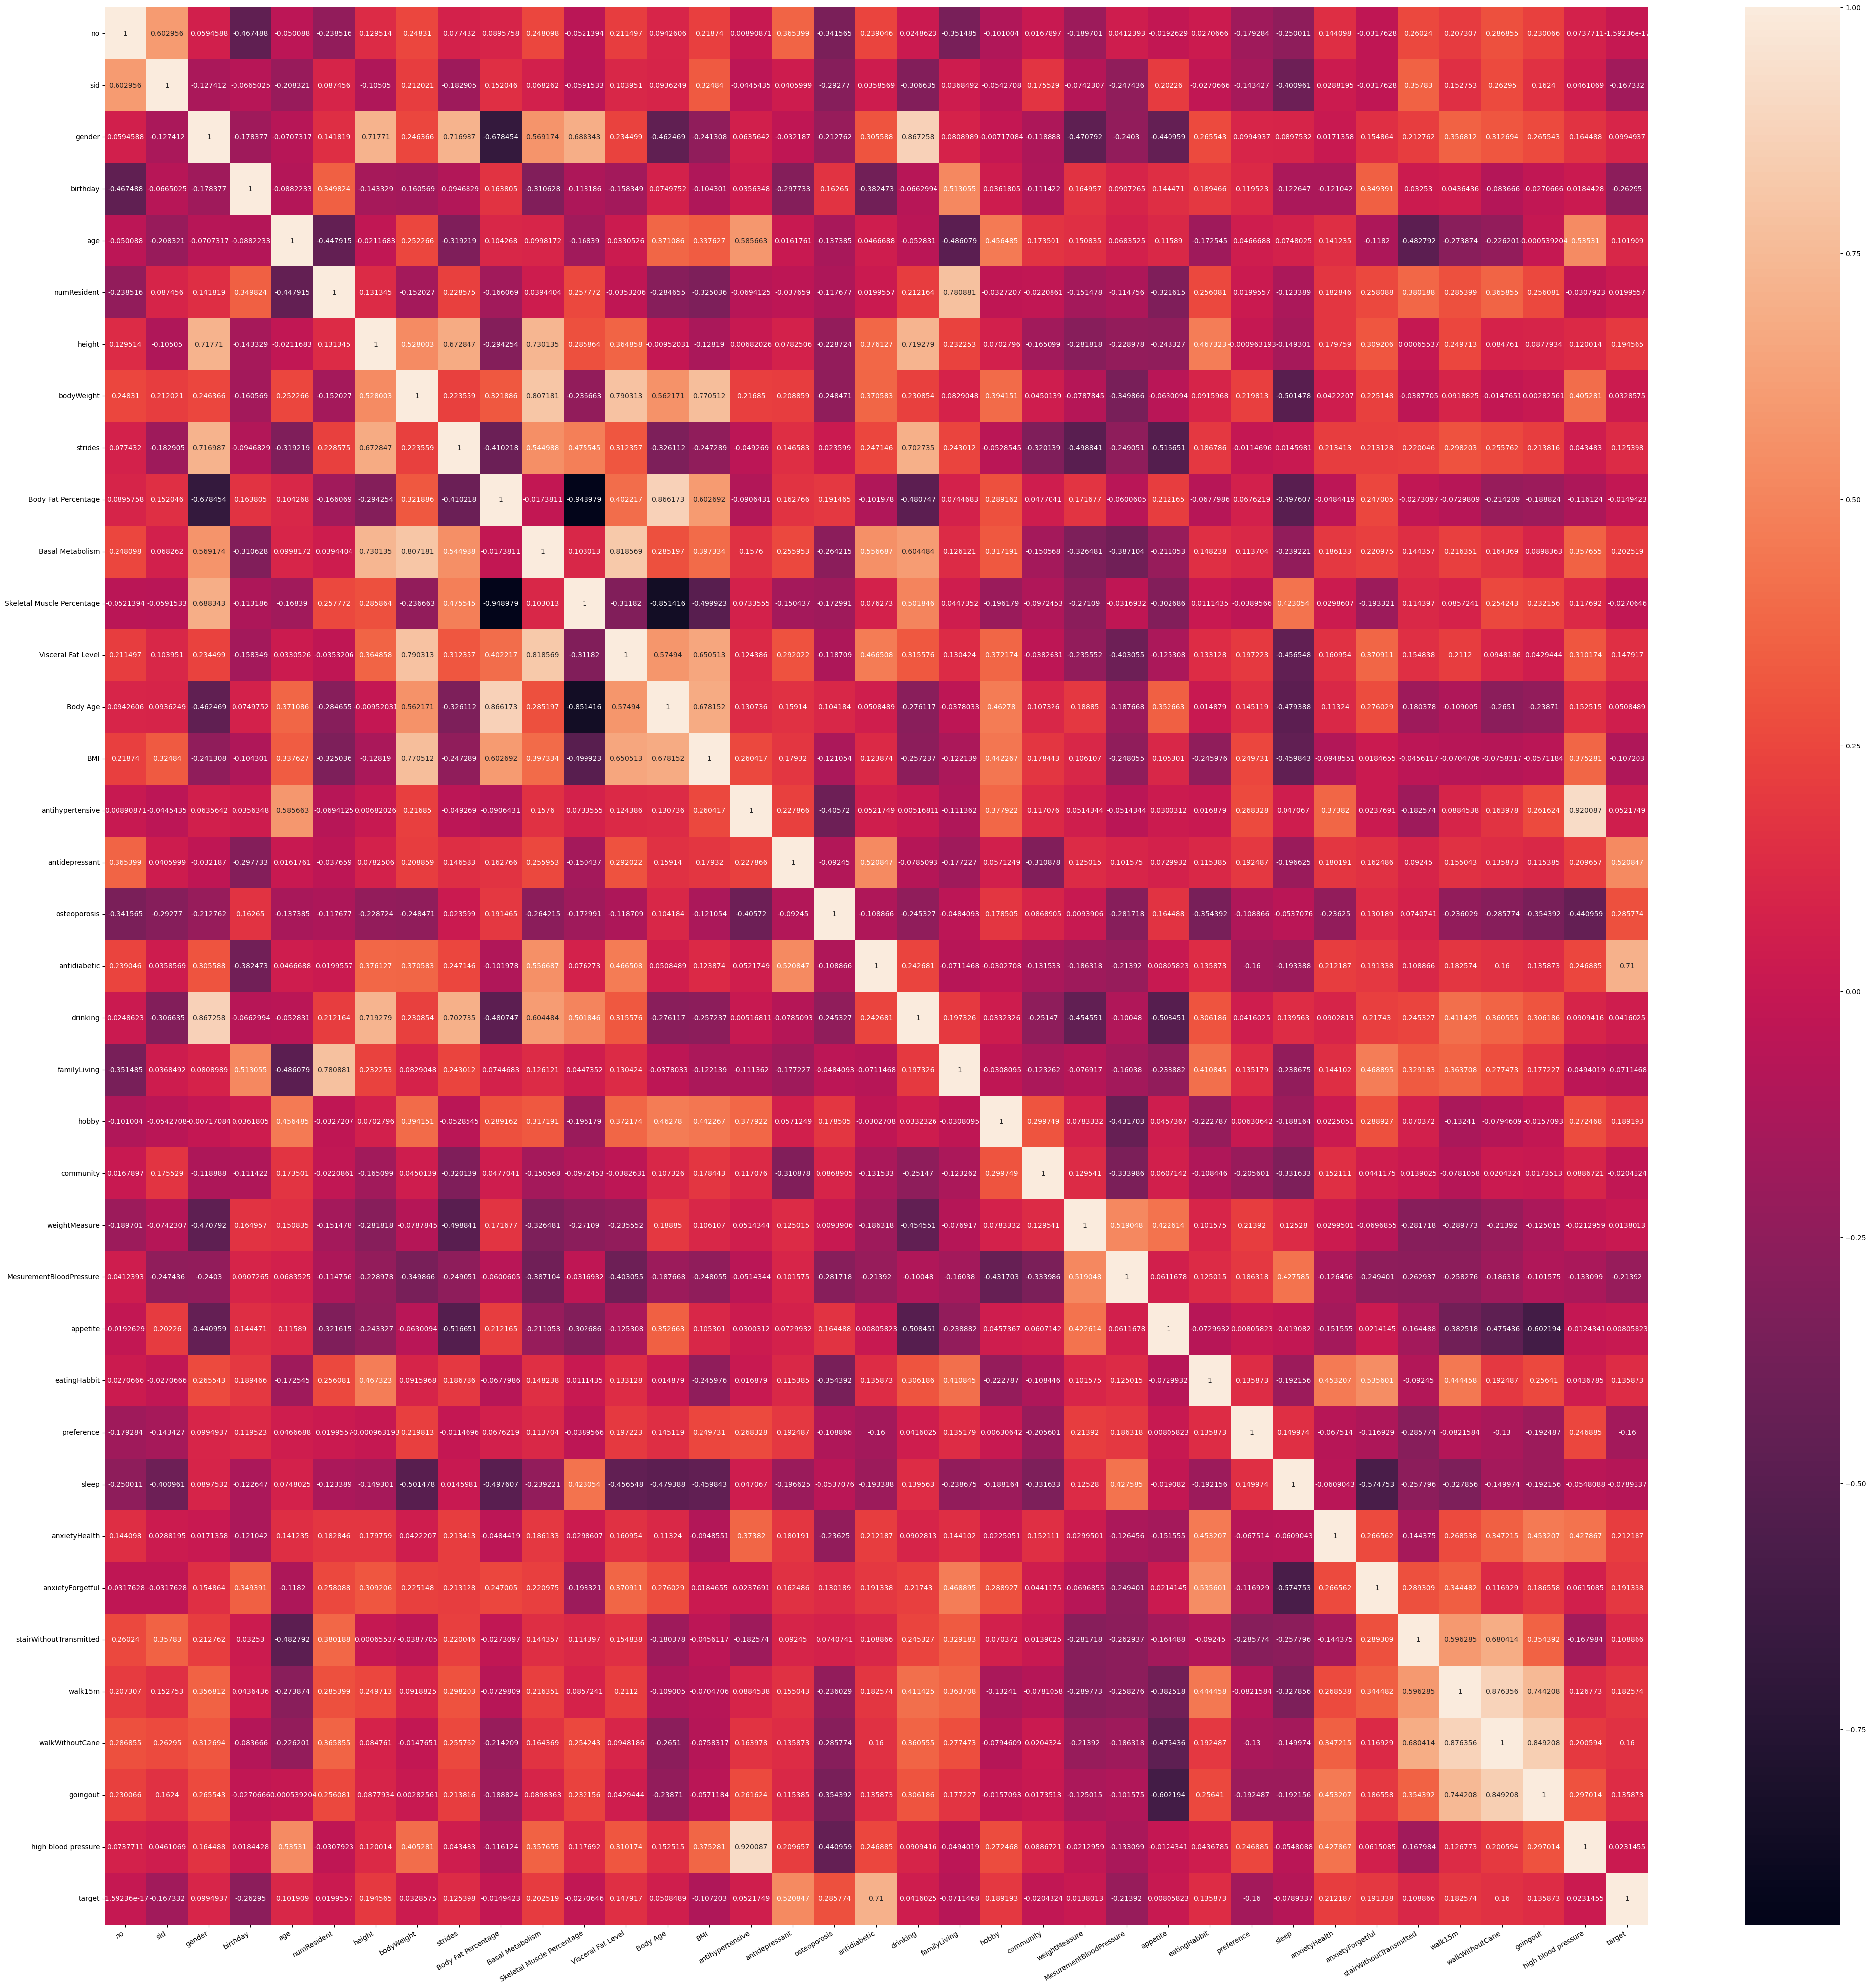

In [13]:
corr = df.drop(columns=['smoking','getupChair','noWeightLoss6','noWeightLoss2','eatHardFood']).corr()
plt.figure(figsize = (50,50))
# sns.heatmap(corr[36:37], cmap="Blues", annot=True)
# sns.heatmap(corr[36:37], annot=True, fmt="g")
sns.heatmap(corr, annot=True, fmt="g")
plt.xticks(rotation=30, ha='right')
plt.savefig('corr.png')
plt.show()

In [14]:
pd.set_option('display.max_columns', None)
corr[36:37]

,no,sid,gender,birthday,age,numResident,height,bodyWeight,strides,Body Fat Percentage,Basal Metabolism,Skeletal Muscle Percentage,Visceral Fat Level,Body Age,BMI,antihypertensive,antidepressant,osteoporosis,antidiabetic,drinking,familyLiving,hobby,community,weightMeasure,MesurementBloodPressure,appetite,eatingHabbit,preference,sleep,anxietyHealth,anxietyForgetful,stairWithoutTransmitted,walk15m,walkWithoutCane,goingout,high blood pressure,target
target,-1.592364e-17,-0.167332,0.099494,-0.26295,0.101909,0.019956,0.194565,0.032858,0.125398,-0.014942,0.202519,-0.027065,0.147917,0.050849,-0.107203,0.052175,0.520847,0.285774,0.71,0.041603,-0.071147,0.189193,-0.020432,0.013801,-0.21392,0.008058,0.135873,-0.16,-0.078934,0.212187,0.191338,0.108866,0.182574,0.16,0.135873,0.023146,1.0


In [15]:
corr.shape

(37, 37)

### Modeling

In [16]:
# df = df.drop(columns=['no','smoking','getupChair','noWeightLoss6','noWeightLoss2','eatHardFood','sid','birthday',])
df2 = df.drop(columns=['no','birthday','sid','familyLiving','hobby','community','getupChair','smoking'
            ,'noWeightLoss6','noWeightLoss2','weightMeasure','appetite','antihypertensive','goingout','sleep','high blood pressure','eatHardFood','MesurementBloodPressure'
            ,'eatingHabbit','stairWithoutTransmitted','walk15m','walkWithoutCane'
            ,'target'])


df = df.drop(columns=['no','birthday','sid','familyLiving','hobby','community','getupChair','smoking'
            ,'noWeightLoss6','noWeightLoss2','weightMeasure','appetite','antihypertensive','goingout','sleep','high blood pressure','eatHardFood','MesurementBloodPressure',
             'eatingHabbit','stairWithoutTransmitted','walk15m','walkWithoutCane'])


In [17]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop("target", axis=1)
y = df["target"]

In [19]:
X_train = df.drop("target", axis=1)
y_train = df["target"]

In [20]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from numpy import sort

score = []
def model(df_x_train, df_x_test, df_y_train, df_y_test, filename):

    # create model instance
    bst = XGBClassifier(n_estimators=1000, learning_rate=0.0001, objective='binary:logistic')

    # fit model
    bst.fit(df_x_train, df_y_train)

    # save model
    pickle.dump(bst, open(filename, "wb"))

    # make predictions
    preds = bst.predict(df_x_test)
    print(classification_report(preds, df_y_test, labels =[0,1]))
    
    # plot feature importance
    plot_importance(bst)
    plt.show()
    return f1_score(df_y_test, preds, average='macro')

#### Oversampling

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sm = SMOTE(random_state = 101,k_neighbors=1)
df_x_res, df_y_res = sm.fit_resample(X_train, y_train)

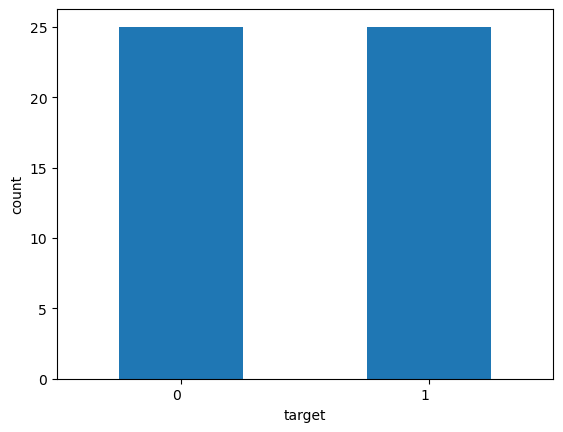

In [22]:
dfRes = pd.DataFrame(df_y_res)
fn.BarPlotCategorical(dfRes,'target')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.80      0.89         5

    accuracy                           0.97        29
   macro avg       0.98      0.90      0.93        29
weighted avg       0.97      0.97      0.96        29



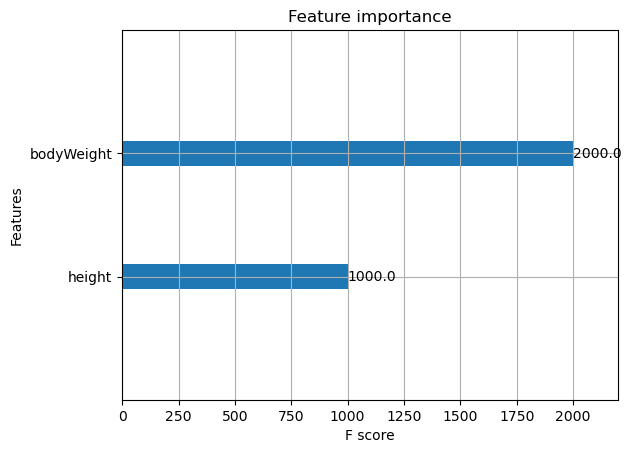

In [23]:
# XGBoost Oversampling
score.append(model(df_x_res, X_train, df_y_res, y_train,'xgb_oversampling2.pkl'))

#### Undersampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
df_x_under, df_y_under = undersample.fit_resample(X_train, y_train)

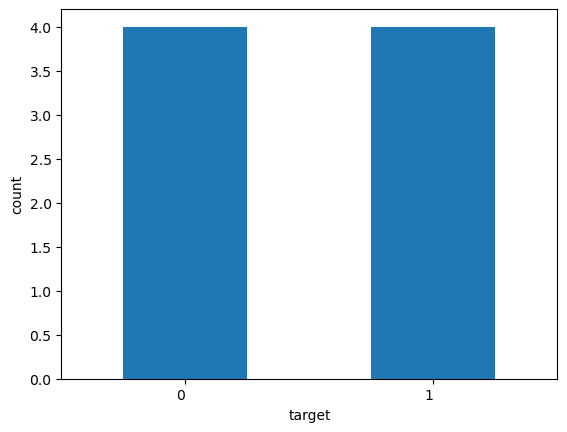

In [25]:
dfUnder = pd.DataFrame(df_y_under)
fn.BarPlotCategorical(dfUnder,'target')

              precision    recall  f1-score   support

           0       0.60      0.94      0.73        16
           1       0.75      0.23      0.35        13

    accuracy                           0.62        29
   macro avg       0.68      0.58      0.54        29
weighted avg       0.67      0.62      0.56        29



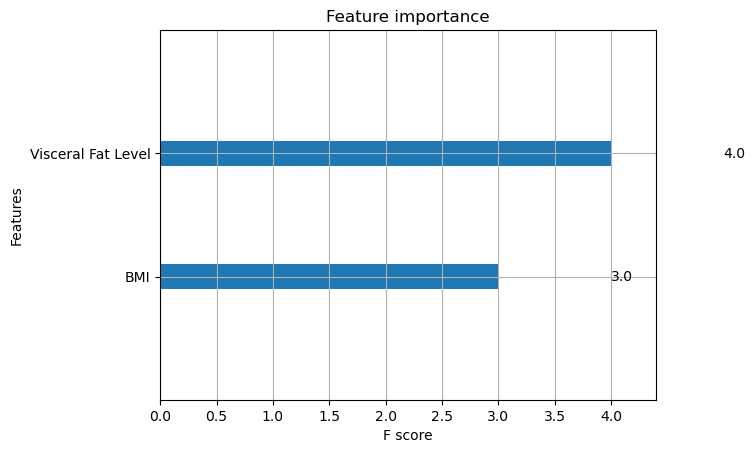

In [26]:
# XGBoost Undersampling
score.append(model(df_x_under, X_train, df_y_under, y_train,'xgb_undersampling2.pkl'))

#### XGBoost no LDA

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       0.00      0.00      0.00         0

    accuracy                           0.86        29
   macro avg       0.50      0.43      0.46        29
weighted avg       1.00      0.86      0.93        29



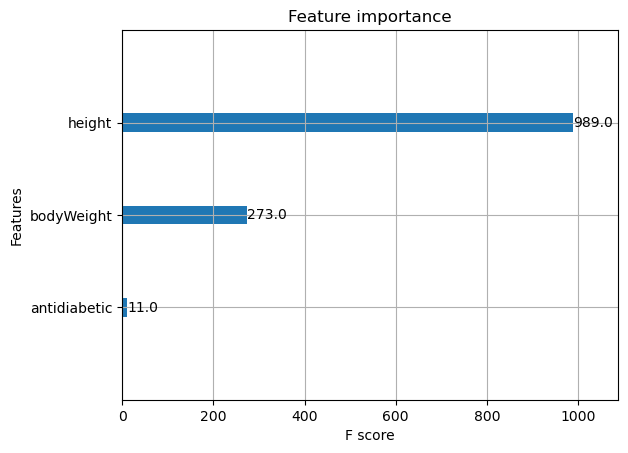

In [27]:
# XGBoost
score.append(model(X_train, X, y_train, y,'xgb_raw2.pkl'))

#### LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
df_x_train = lda.fit_transform(X_train, y_train)

In [29]:
df_x_train = pd.DataFrame(df_x_train)

In [30]:
# "training" our model on the original dataset
from sklearn.metrics import log_loss
import numpy as np
ts = df_x_train[0].tolist()
log_loss_train = [log_loss(y_train, df_x_train >= t) for t in ts]
best_thres_train = ts[np.argmin(log_loss_train)]
best_thres_train

3.5460449623541135

In [31]:
preds = []
for i in df_x_train[0].tolist():
    if i > best_thres_train:
        preds.append(1)
    else:
        preds.append(0)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(preds, y_train, labels=[0,1]))
score.append(f1_score(y_train, preds, average='macro'))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       0.00      0.00      0.00         0

    accuracy                           0.86        29
   macro avg       0.50      0.43      0.46        29
weighted avg       1.00      0.86      0.93        29



#### XGBoost with LDA

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.80      0.89         5

    accuracy                           0.97        29
   macro avg       0.98      0.90      0.93        29
weighted avg       0.97      0.97      0.96        29



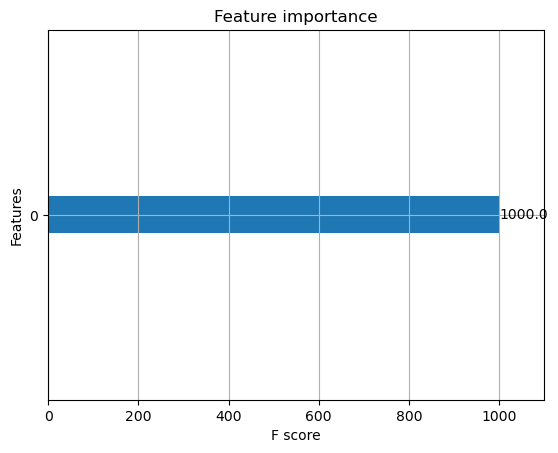

In [33]:
# XGBoost with LDA
xtest = lda.fit_transform(X_train, y_train)
score.append(model(df_x_train, xtest, y_train,y,'xgb_LDA2.pkl'))

In [34]:
lda.transform(X_train)

array([[ 1.15289573],
       [-6.16410817],
       [ 1.25157807],
       [ 0.99870158],
       [ 1.99994151],
       [ 0.78154624],
       [-0.26988919],
       [ 0.50571269],
       [-6.15312187],
       [-0.26991294],
       [ 1.94391488],
       [ 2.3152506 ],
       [ 3.54604496],
       [ 0.53724575],
       [ 2.11003009],
       [ 2.1179916 ],
       [ 1.6674457 ],
       [ 1.46761727],
       [ 1.37953702],
       [ 0.83177293],
       [ 0.45110511],
       [-0.699804  ],
       [ 0.8065948 ],
       [-7.24558656],
       [-7.65452628],
       [ 0.70266795],
       [-0.41090562],
       [-0.04427235],
       [ 2.34453251]])

#### Summary

In [35]:
df_score = pd.DataFrame({
    'technique': ['Oversampling', 'Undersampling', 'raw_data', 'log_loss', 'LDA'],
    'score': score
})

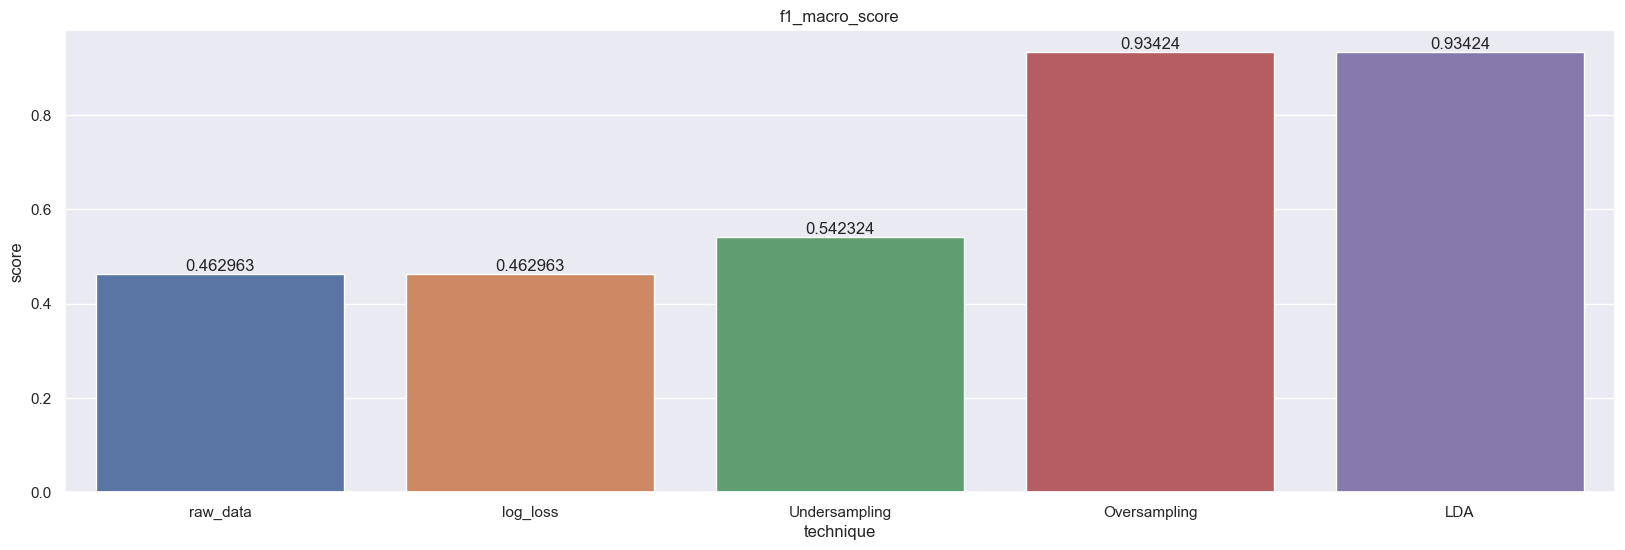

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(20, 6)})
ax = sns.barplot(x='technique', y='score', data=df_score.sort_values(by='score'),errwidth=0)
plt.title('f1_macro_score')
for i in ax.containers:
    ax.bar_label(i,)

In [37]:
score

[0.9342403628117915,
 0.5423242467718794,
 0.46296296296296297,
 0.46296296296296297,
 0.9342403628117915]

In [38]:
X_train.shape

(29, 19)

In [39]:
picklefile = open("xgb_oversampling2.pkl", "rb")
model = pickle.load(picklefile)